# Week 1 lab2: Data preprocessing and visualisation

__This lab__: The aim is to practice a few preprocessing (reshaping/finding outliers/marginalisation) and visualisation methods on the Central England Temperature dataset available to download at: https://www.metoffice.gov.uk/hadobs/hadcet/data/download.html.

An introduction to basics of Pandas is available at https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.00-Introduction-to-Pandas.ipynb,
and for Matplotlib at https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb which are highly recommended during attempting the lab.

In [1]:
# Clean the workspace and screen
%clear
%reset
import matplotlib.pyplot as plt
plt.close('all')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np

## Import .dat formated data

The Central England Temperature dataset is stored in a file named "cetdl1772on.dat" that you should have now downloaded it from the link above. Use pandas's ```read_fwf``` command to load this data to memory. Note that we need to specify that the dataset has no header, i.e. ```pd.read_fwf('cetdl1772on.dat', header = None, widths = [5]*14)```. The syntax of this command may seem confusing but we recommend you to have a look at the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html.
The raw data is stored in a 2D array/matrix. Print out the number of rows and columns of this data.

In [3]:
data_raw = pd.read_fwf('cetdl1772on.dat', header = None, widths = [5]*14)

print('raw data rows: %d \n' % len(data_raw.iloc[:,0]))

raw data rows: 7781 



In [4]:
print('raw data cols: %d \n' % len(data_raw.iloc[0,:]))

raw data cols: 14 



## Exctract years, days, temperature informations

The data's 2D array has mixed information about the day and year numbers and the temperature values. Extract new vectors or matrices from this data which include information only about the years, days, temperatures e.g., for temperatures you need to extract the last 12 columns of this data into a new matrix. Also scale down the temperatures by factor 10, in order to make them in Celsius. Print the range of years and days that this data covers. Also print the first 10 rows of the extracted temperature matrix.

In [5]:
years = np.unique(data_raw.iloc[:,0]) # many years are repeated unique will only return unique years
days  = np.unique(data_raw.iloc[:,1]) # same for days, unique
temp  = data_raw.iloc[:,2:]

temp  = temp/10;               # convert temperatures to celcius

years

array([1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903,
       1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
       1915, 1916, 1917, 1918, 1919, 1920, 1921, 19

In [6]:
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [7]:
temp.iloc[0:10,:]

,2,3,4,5,6,7,8,9,10,11,12,13
0,3.2,-1.5,1.8,2.5,8.7,12.8,18.7,17.7,10.5,11.1,7.8,11.2
1,2.0,0.7,2.8,3.8,7.7,13.8,15.4,15.8,14.3,15.0,8.5,6.2
2,2.7,1.5,3.6,3.3,8.4,17.0,13.9,15.3,11.3,12.4,8.3,6.0
3,2.7,-2.5,6.1,5.8,9.6,9.0,15.1,16.0,17.3,11.4,6.0,4.7
4,1.5,-0.5,6.8,6.9,13.3,14.6,17.9,17.0,17.3,11.6,8.3,5.0
5,2.2,-4.5,5.1,7.7,11.3,10.5,17.5,19.8,16.0,13.4,13.4,4.2
6,2.5,1.2,5.8,8.7,10.6,16.2,14.6,19.4,15.8,11.4,13.4,3.2
7,0.0,4.7,4.6,10.4,8.4,18.1,16.3,17.7,13.5,9.4,9.5,5.5
8,0.0,5.6,2.1,8.7,6.7,15.5,17.9,15.5,14.3,10.6,7.0,6.2
9,4.5,2.8,1.3,6.7,5.9,14.8,17.7,15.3,12.0,11.9,12.2,10.0


# Missing data/outliers: replacing by NaN

Temperature data contains outliers because some missing temperature values (some days in year 2022, also the 30th or 31st day of some months) had been originally filled as -99 degree Celsius. Find and replace these values by nan (Not a Number) variable.

In [8]:
# Use logical indexing to access/modify certain matrix entries
temp[temp < -80] = float('nan')

Use numpy's ```reshape``` command to reshape data into a 3D array: first coordinate days, second years, third months. Let every month have 31 days (as currently set by the raw data). Note that you need to format your data as a numpy array first. Find more information about reshaping here: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [9]:
temp = temp.to_numpy().reshape((31, len(years), 12), order='F')

# Marginalisation

Use matplotlib's ```plot``` command with appropriate title, axis-labelling tools (see details at: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html or Chapter 4 of this book: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) in order to plot together the yearly Average and Median temperatures. Use the numpy's ```nanmean``` and ```nanmedian``` commands when computing the mean and median values, respectively, so to ignore the outliers/missing values. Can you see a trend in your plots e.g. is it getting warmer every year?

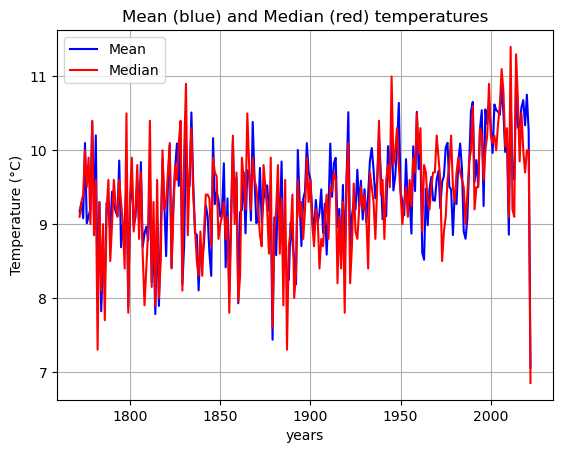

In [10]:
Mean = np.nanmean(temp, (0, 2)) # nanmean ignores array entries with nan
Median = np.nanmedian(temp, (0, 2))

Mean = np.squeeze(Mean)   # squeeze array size gets rid of (redundant) dimention axes that have size 1
Median = np.squeeze(Median)

fig1, ax1 = plt.subplots()

#Add abels/legends to your figure
ax1.set_title('Mean (blue) and Median (red) temperatures')
ax1.set_xlabel('years')
ax1.set_ylabel('Temperature (°C)')

line1, = ax1.plot(years, Mean, 'blue') #plot mean in blue
line2, = ax1.plot(years, Median, 'red');

line1.set_label('Mean')
line2.set_label('Median')

ax1.legend()
ax1.grid()

Now, open a new figure and in two separate subplots, plot the monthly average temperatures and the standard deviations. (Again, use ```nanmean``` and ```nanstd``` commands for computing the mean and std, respectively).  

Text(0, 0.5, 'Temperature (°C)')

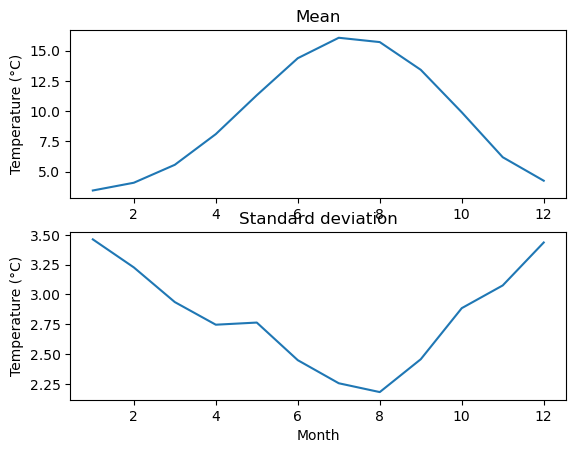

In [11]:
# Compute mean and STD using omitnan option
Mean    = np.nanmean(temp, (0, 1))
Mean    = np.squeeze(Mean);

STD    = np.nanstd(temp, axis = (0, 1), ddof = 1)
STD    = np.squeeze(STD)

#--option 1: plot Mean and STD separately
fig2, (ax2, ax3) = plt.subplots(2)
ax2.plot(np.array(range(1,13)), Mean)
ax2.set_title('Mean')
# ax2.set_xlabel('Month')
ax2.set_ylabel('Temperature (°C)')

ax3.plot(np.array(range(1,13)), STD)
ax3.set_title('Standard deviation')
ax3.set_xlabel('Month')
ax3.set_ylabel('Temperature (°C)')

Repeat this in a new figure by using matplotlib's ```errorbar``` function, to plot the monthly means in solid line and the standard deviations as errorbars. Can you observe from these plots which month is the warmest on average, and which has the lowest variation in the temperature?

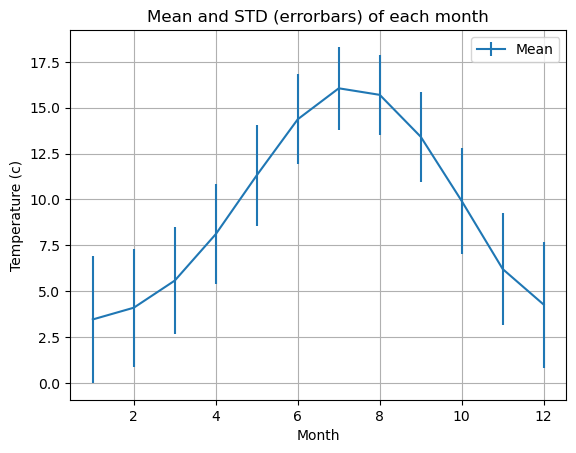

In [12]:
#--option 2: plot Mean and STD jointly using errorbar
fig3, ax4 = plt.subplots()

# add figure labels/legends
ax4.set_title('Mean and STD (errorbars) of each month')
ax4.set_xlabel('Month')
ax4.set_ylabel('Temperature (c)')

line3 = ax4.errorbar(np.array(range(1,13)), Mean, yerr=STD)

line3.set_label('Mean')

ax4.legend()
ax4.grid()

# Visualising 2D arrays

Reshape data into a 2D matrix: rows (years), cols (timeseries of the days of a year). NB: the order of reshaping in MATLAB (Fortran) vs Numpy's default are different. To fill data in a reshaped array, MATLAB starts from the first axis/dimension, then it goes to fill-up the second axis/dimension, then the third, and so on (the Numpy's default is reverse). Read Numpy's documentation on ```reshape```: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html.

Now, use matplotlib's ```imshow``` command to visualise this reshaped 2D array. Add colorbar and appropriate labelling to the x-y axis, so to clarify the displayed image's colour values and also the labels of each dimension. (see details at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). How consistent was the trend of "warmer summers than winters" across all the past years?

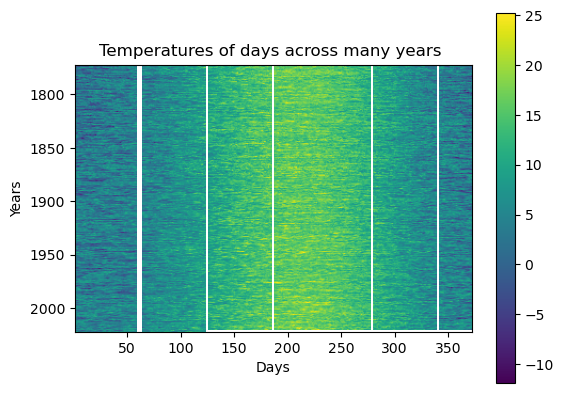

In [13]:
TS = np.transpose(temp, (1, 0, 2)) # First we permute dimensions so to have 3D array of year, days, months
TS = TS.reshape((len(years), 12*31), order = 'F');   # Next we reshape into num_years (auto-calculated) by num_days (user specified, here 12*31)

fig4, ax5 = plt.subplots()

graph = ax5.imshow(TS, extent = [1, 31*12, max(years), min(years)])

# add figure labels/legends
ax5.set_title('Temperatures of days across many years ')
ax5.set_xlabel('Days');
ax5.set_ylabel('Years')
fig4.colorbar(graph) # add colorbar to figure to see what values (temperatures) are the image colors map to.

Choose a year (e.g., the third year in your array). Then plot the long vector (time-series) of temperatures for that year. Again, use appropriate axis-labelling, plot-titling tools along with your visualisation.

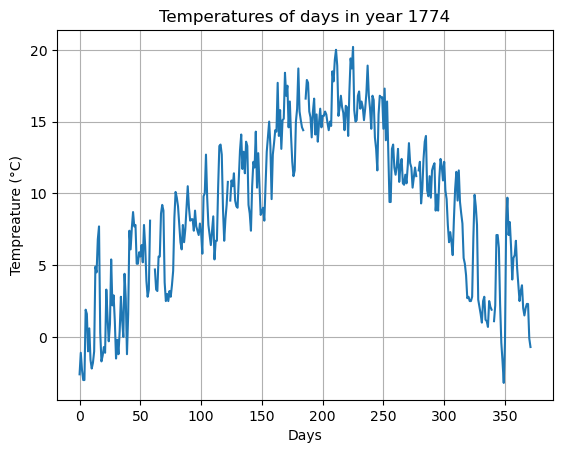

In [14]:
fig5, ax6 = plt.subplots()
ax6.plot(TS[2, :])

# add figure labels/legends
title_string = 'Temperatures of days in year ' + str(years[2])
ax6.set_title(title_string)
ax6.set_xlabel('Days')
ax6.set_ylabel('Tempreature (°C)')
ax6.grid() #add grid to figure

# Histograms

Finally, let's visualise, through histograms, the temperature distributions of the months January and August to make sure that we see a difference. 
For this create two long vectors containing temperature data (all days and years) for January and August. Open a new figure and use matplotlib's ```hist``` command to display the temperature distributions of these two months in two different colours. Use the legend command to specify in the figure which colour shows the histogram of which months.

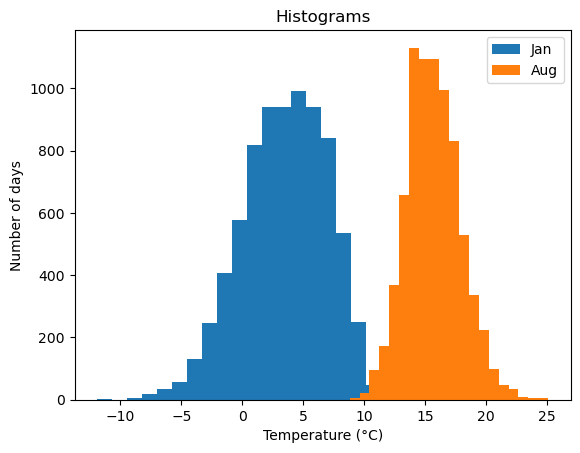

In [15]:
# Let's create two long vectors containing temp data for Jan and August
temp_Jan = temp[:, :, 0] # a submatrix
temp_Aug = temp[:, :, 7] # a submatrix

temp_Jan = temp_Jan.flatten() # vectorised
temp_Aug = temp_Aug.flatten() # vectorised

fig5, ax6 = plt.subplots()

nbins = 20;
ax6.hist(temp_Jan, nbins, label = 'Jan')
ax6.hist(temp_Aug, nbins, label = 'Aug')

# add figure labels/legends
ax6.set_title('Histograms')
ax6.set_ylabel('Number of days');
ax6.set_xlabel('Temperature (°C)')

ax6.legend()